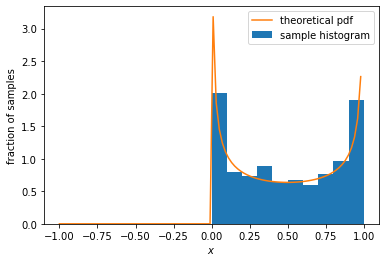

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

# Бета-рачспределение, α и β - параметры распределения
a = b = 0.5
beta_rv = stats.beta(a, b)
v = beta_rv.rvs(1000)

# Гистограмма выборки  
plt.hist(v, label='sample histogram', density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

# Теоретическая плотность распределения
x = np.linspace(-1,1,100)
pdf = beta_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf')
plt.legend()

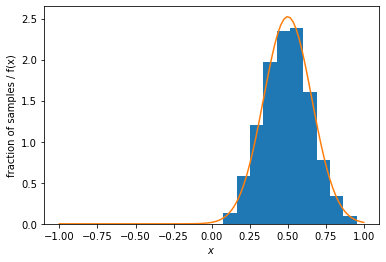

In [39]:
# Функция для нахождения выборочных средних 1000 выборок объема n
def samples_mean(n):
    m = np.zeros(1000)
    for index in range(1000):
        m[index] = beta_rv.rvs(size = n).mean()      
    return m

# Вычисление теоретических математического ожидания и дисперсии для бета-распределения
EX = a/(a+b)
DX = a*b/((a+b)**2*(a+b+1))

# Среднеквадратическое отклонение нормального распределения  
def sigma_n(n):
    return (DX/n)**(1/2)           
           
# Функция построения гистограммы распределения выборочных средних выборки объема n
# и графика плотности нормального распределения

def plot_comparison(n):
    plt.hist(sample(n), density=True)
    norm_approx = stats.norm(EX, sigma_n(n))
    pdf = norm_approx.pdf(x)
    plt.plot(x, pdf)
    plt.ylabel('fraction of samples / f(x)')
    plt.xlabel('$x$')    
    
# Выборка объема n=5
plot_comparison(5)    

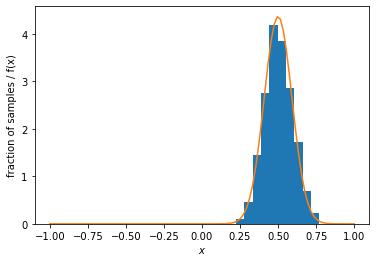

In [40]:
plot_comparison(15)

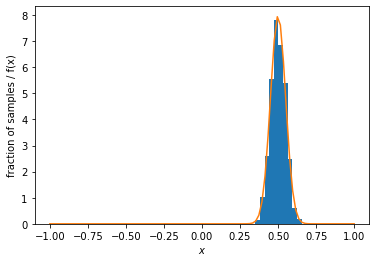

In [42]:
plot_comparison(50)

# Выкладки
математическое ожидание бета-распределения Beta(α,β):
$$ EX = α/(α+β) $$ 
дисперсия бета-распределения Beta(α,β):
$$ DX = α*β/((α+β)^2*(α+β+1)) $$
параметры нормального распределения N(η,σ^2), которыми аппроксимируется распределение выборочных средних:
$$ σ = \sqrt(DX/n) $$ 
$$ η = EX $$
# Вывод
Можно заметить, что по сравнению с исходной плотностью случайной величины, гистограмма по выборочным средним становится унимодальной. С увеличением объёма выборки гистограмма выглядит более гладкой.процесс сглаживания продолжается. 
Можно сделать вывод, что при  увеличения объема выборки n точность нормальной аппроксимации возрастает.